In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib qt

Gradient decay
==========================================

Some results worth saving and displaying for visualization and understanding

1/ Decay of gradient variances with increasing qubit count
---------------------------

First importing the relevant packages

In [2]:
import sys
sys.path.append('../src')
sys.path.append('src')
import matplotlib.pyplot as plt
import numpy as np
from gadget_plots import *

data_folder = '../../results/data/'

colours = np.array([plt.cm.Purples(np.linspace(0, 1, 10)),          # global
                    plt.cm.Blues(np.linspace(0, 1, 10)),            # local
                    plt.cm.Oranges(np.linspace(0, 1, 10)),          # gadget2
                    plt.cm.Reds(np.linspace(0, 1, 10)),             # gadget3
                    plt.cm.Greys(np.linspace(0, 1, 10))])[:, 3:]    # legends

Exponential decay of the global Hamiltonian
$$H_G = \bigotimes_{i=1}^n \sigma_i^z $$

Trainability of the local Hamiltonian
$$H_L = Z_1^{(c)} Z_2^{(c)}$$

Equivalent plot for the gadget decomposition of the global Hamiltonian
$$H^{gad} = H^{anc} + \lambda V 
    = (\mathbb{I} - Z_1^{(a)} Z_2^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_4^{(a)})
    + (\mathbb{I} - Z_2^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_2^{(a)} Z_4^{(a)}) + (\mathbb{I} - Z_3^{(a)} Z_4^{(a)}) 
    + \lambda (Z_1^{(c)} \otimes X_1^{(a)} + Z_2^{(c)} \otimes X_2^{(a)} + Z_3^{(c)} \otimes X_3^{(a)} + Z_4^{(c)} \otimes X_4^{(a)})$$

Combining the plots of the normalized global, local and gadget Hamiltonians  
<span style="color:red">/!\ hard-coded implementation </span>.

combining data from:  
'gradients/220407_global_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples.dat', and
'gradients/220407_local_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples.dat'
'gradients/220410_gadget3_circuit_8qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples.dat'

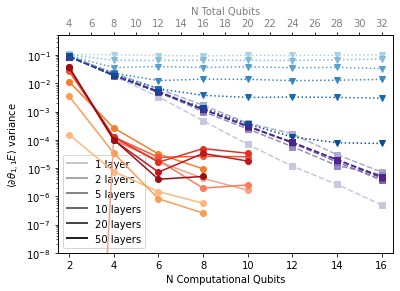

In [3]:
file_list = [data_folder + 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220411_gadget2_circuit_8qubits_50layers_0.5lambda_1000samples.dat',
             data_folder + 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples-comb.dat']
# norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
# norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
# %matplotlib widget
plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1], lambda_value=0.5)

In [4]:
norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
print(norm_dict['gadget'])

[1.125 4.375 9.625]


Variance evolution on the script using the StronglyEntanglingLayers and the ExpvalCost  
<span style="color:red">/!\ Abandoned implementation </span>.

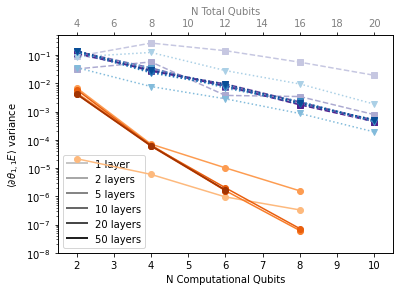

In [5]:
file_list = [data_folder + 'gradients/220413_global_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_local_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_gadget2_8qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

Variance evolution when using the HardwareEfficientAnsatz and the ExpvalCost

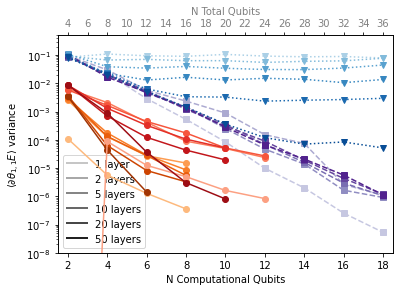

In [6]:
file_list = [data_folder + 'gradients/220414_global_18qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220415_local_18qubits_50layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220414_gadget2_8qubits_50layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220419_gadget3_12qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

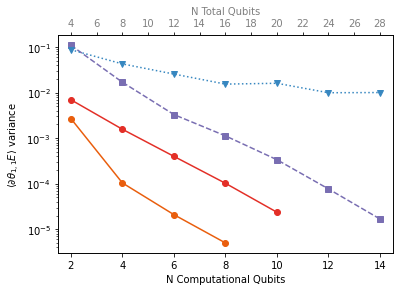

In [7]:
file_list = [data_folder + 'gradients/220422_global_14qubits_rlayers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220422_local_14qubits_rlayers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220422_gadget2_14qubits_rlayers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220422_gadget3_14qubits_rlayers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours[:,3:], normalize=True, layering='linear')

Looking at linear depth in the number of qubits

2/ Exploring the effect of λ and depth
-------------

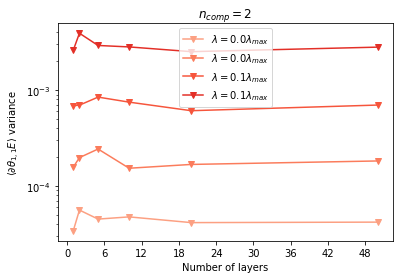

In [8]:
file = data_folder + 'gradients/220404_gadget_circuit_2qubits_50layers_200samples.dat'
plot_variances_vs_layers([file], [colours[3]])

4 computational qubits, varying depth, varying perturbation factor

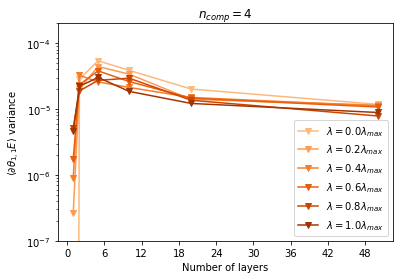

In [9]:
file = data_folder + 'gradients/220426_gadget2_4qubits_50layers_0-1lambda_200samples.dat'
norm_file = data_folder + 'norms/gadget_4qubits_0.0-1.0lambda.dat'
norm_dict = {'gadget': np.loadtxt(norm_file)[:,2]}
plot_variances_vs_layers([file], [colours[2]], normalize=norm_dict, limits=[1e-7, 2e-4])

Training
=======

2-local gadget decomposition
---------------------

4 qubits computational Hamiltonian and 2 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [10]:
subfolder = 'training/gadget2/'

# seed = 13
# file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_{:1.1f}lambda_seed{}.dat'.format(l, seed) for l in np.linspace(0, 1, 6)]
# plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

# for seed in [14, 15]:
#     file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_{:1.1f}lambda_seed{}.dat'.format(l, seed) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

# seed = 17
# file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_{:1.1f}lambda.dat'.format(seed, l) for l in np.linspace(0, 1, 6)]
# plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

# qubits = 4
# layers = 2
# for seed in [2, 3]:
#     file_list = [data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

6 qubits computational Hamiltonian and 2 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [11]:
# qubits = 6
# layers = 2
# for seed in [13, 14, 15]:
#     file_list = [data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

4 qubits computational Hamiltonian and 4 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [12]:
# subfolder = 'training/gadget2/'

# qubits = 4
# layers = 4
# iterations = 500
# step = 0.3
# for seed in [2, 3, 4]:
#     file_list = [data_folder + subfolder + '220420_training_gadget2_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

4 qubits computational Hamiltonian and 8 layers deep Ansatz  

In [13]:
# %matplotlib qt

In [14]:
energies_file = 'energies/gadget_4-4qubits_0.0-1.0lambda.dat'
data = np.loadtxt(data_folder + energies_file)
perturbations = data[:,1]
ground_energies = data[:,2]
print("lambda scalings: ", perturbations)
print("respective ground energies: ", ground_energies)
target_energies = {'gadget': ground_energies, 'computational': -1}

lambda scalings:  [0.  0.2 0.4 0.6 0.8 1. ]
respective ground energies:  [ 0.         -0.00187646 -0.00752337 -0.0169929  -0.03037073 -0.04777395]


c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


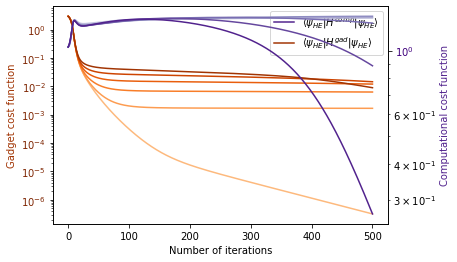

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


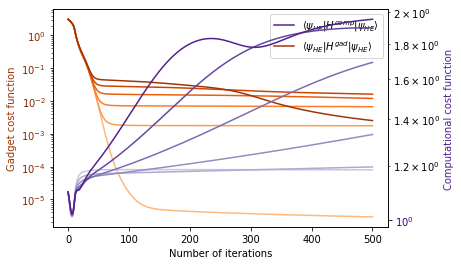

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


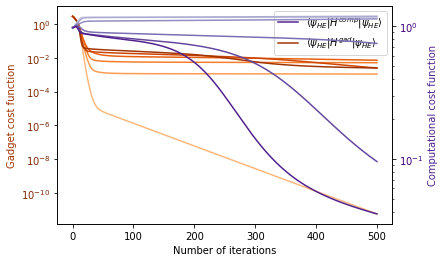

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


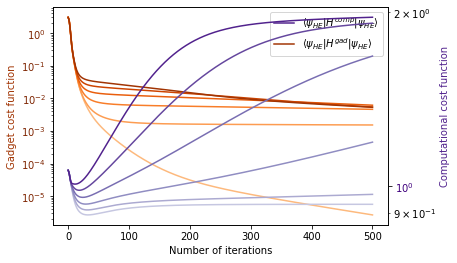

In [15]:
subfolder = 'training/gadget2/'
qubits = 4
layers = 8
iterations = 500
step = 0.3
perturbations = np.linspace(0, 1, 6)
for seed in [2, 3, 4, 5]:
    file_list = [data_folder + subfolder + '220421_training_gadget2_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for l in perturbations]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]], target_energies=target_energies)

In [16]:
# %matplotlib widget

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


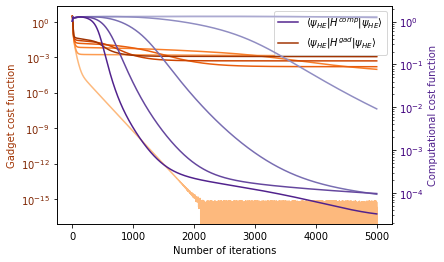

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


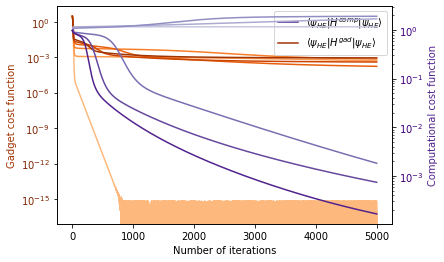

In [17]:
subfolder = 'training/gadget2/'
dates = ['220427']*2 + ['220428']*4
qubits = 4
layers = 8
iterations = 5000
step = 0.3
perturbations = np.linspace(0, 1, 6)
for seed in [2]:
    file_list = [data_folder + subfolder + dates[i] + '_training_gadget2_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for i, l in enumerate(perturbations)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]], 
                  target_energies=target_energies)

dates = ['220427'] + ['220428']*5
perturbations = np.linspace(0, 1, 6)
for seed in [4]:
    file_list = [data_folder + subfolder + dates[i] + '_training_gadget2_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for i, l in enumerate(perturbations)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]], 
                  target_energies=target_energies)

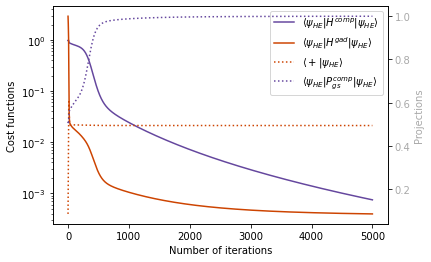

In [18]:
subfolder = 'training/gadget2/'
dates = ['220428']
qubits = 4
layers = 8
iterations = 5000
step = 0.3
perturbations = [0.8]
target_energies['gadget'] = [target_energies['gadget'][-2]]
for seed in [4]:
    file_list = [data_folder + subfolder + dates[i] + '_training_gadget2_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for i, l in enumerate(perturbations)]
    plot_training_with_witnesses(file_list, np.swapaxes(colours, 0, 1)[-3:, [0, 2]], 
                                 target_energies=target_energies)

6 qubits computational Hamiltonian and 6 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [19]:
# qubits = 6
# layers = 6
# iterations = 500
# step = 0.3
# for seed in [2, 3]:
#     file_list = [data_folder + subfolder + '220420_training_gadget2_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

3-local gadget decomposition
--------------------------

4 qubits computational Hamiltonian and 2 layers deep Ansatz  
<span style="color:red">/!\ Forward light cone issue </span>.

In [20]:
subfolder = 'training/gadget3/'
# qubits = 4
# layers = 2
# iterations = 1000
# for seed in [2, 3, 4, 5, 6]:
#     file_list = [data_folder + subfolder + '220419_training_gadget3_{:02}qubits_{:02}layers_{}iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, seed, l) for l in np.linspace(0, 1, 6)]
#     plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


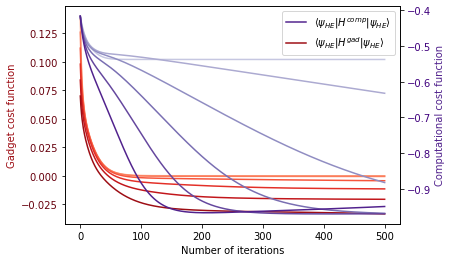

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


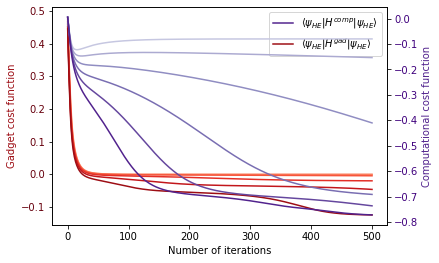

In [21]:
subfolder = 'training/gadget3/'
qubits = 4
layers = 4
iterations = 500
step = 0.3
for seed in [4, 5]:
    file_list = [data_folder + subfolder + '220420_training_gadget3_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for l in np.linspace(0, 1, 6)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 3]])

6 qubits computational Hamiltonian and 9 layers deep Ansatz 

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


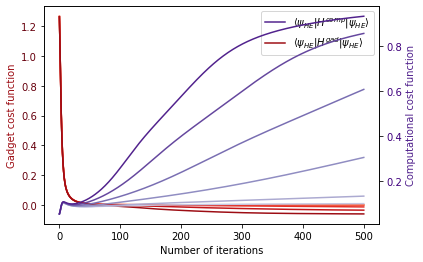

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


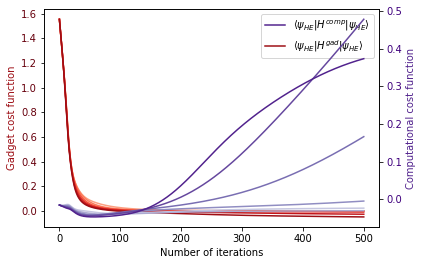

In [22]:
subfolder = 'training/gadget3/'
qubits = 6
layers = 9
iterations = 500
step = 0.3
for seed in [2, 3]:
    file_list = [data_folder + subfolder + '220421_training_gadget3_{:02}qubits_{:02}layers_{}iterations_step{}_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, step, seed, l) for l in np.linspace(0, 1, 6)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 3]])